In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python

In [3]:
import os
os.chdir("drive/Collab/opencv")
!ls

bookpage.jpg	      filter2.jpg  gola.jpg    heavy.mkv  YPR58OX.jpg
cv2_playground.ipynb  filter3.jpg  granna.png  lenna.png
dd_me.jpg	      filter.jpg   gravy.avi   me.jpg


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


-1 == IMREAD_UNCHANGED

---


0 == cv2.IMREAD_GRAYSCALE

---


1 == cv2.IMREAD_COLOR


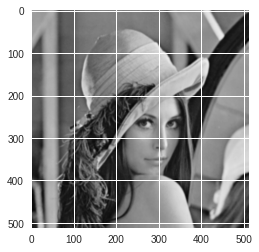

True

In [5]:
img = cv2.imread('lenna.png', 0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.show()
cv2.imwrite('granna.png', img)

In [23]:
feed = cv2.VideoCapture('heavy.mkv')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('gravy.avi', fourcc, 20.0, (360,360))
counter = 0
try:
  while(True):
    ret, frame = feed.read()
    
    if ret == False or counter == 100:
      feed.release
      break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(gray)
    axis('off')
    print(counter)
    imshow(frame)
    imshow(gray)
    show()
    clear_output(wait=True)
    counter+=1
except KeyboardInterrupt:
  feed.release()
out.release()
print('released video source')

released video source


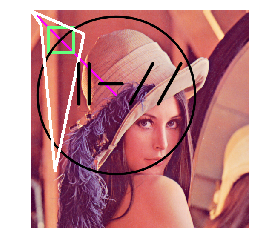

In [57]:
img = cv2.imread('lenna.png', 1)
cv2.line(img, (0,0),(200,200), (255,0,255), 3)
cv2.rectangle(img, (40,40), (100,100),(125,255,100),5)
cv2.circle(img, (200,200), 185, (0,0,0), 3, cv2.LINE_AA)
pts = np.array([[1,2],[23,34],[56,378],[124,56]],np.int32)
cv2.polylines(img,[pts], True, (255,255,255), 6)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, '||-//', (100,200), font, 3,(0,0,0), 5, cv2.LINE_AA)
axis('off')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

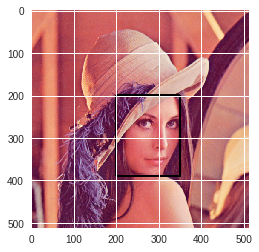

In [25]:
img = cv2.imread('lenna.png', 1)
px = [0,255,255]
img[100,100] = px
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img,(200,200),(350,390), (0,0,0),4)
plt.imshow(img)
plt.show()


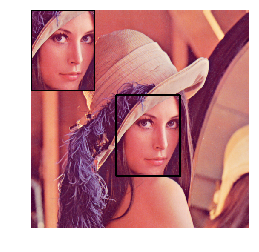

In [26]:
axis('off')
lenna_face = img[200:390,200:350]
img[0:190,0:150] =  lenna_face
plt.imshow(img)
plt.show()

(896, 896, 3)


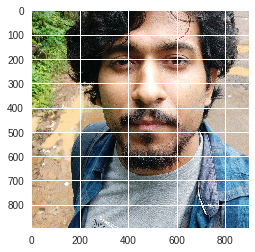

In [69]:
img1 = cv2.imread('me.jpg')
img2 = cv2.imread('dd_me.jpg')
shape = img2.shape
print(shape)
img1 = cv2.resize(img1,shape[:2])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
imshow(img1)
show()

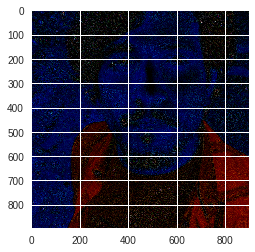

True

In [42]:
img = cv2.subtract(img2, img1)
imshow(img)
show()
cv2.imwrite('filter.jpg', img)

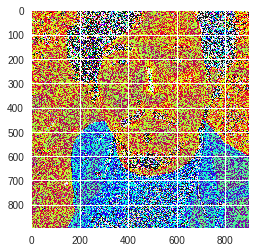

True

In [44]:
img = img2-img1
imshow(img)
show()
cv2.imwrite('filter2.jpg', img)

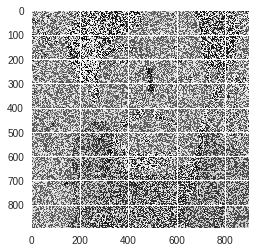

True

In [45]:
img = img2-img1
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img)
show()
cv2.imwrite('filter3.jpg', img)

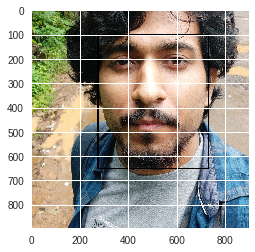

In [70]:
cv2.rectangle(img1, (275,100),(730,650),(0,0,0),(4))
my_face = img1[100:650, 275:730]
imshow(img1)
show()



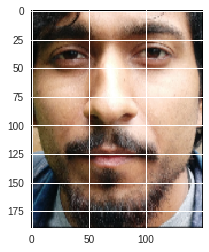

In [80]:
h,w = lenna_face.shape[:2]
my_face = cv2.resize(my_face, (w,h))
imshow(my_face)
show()

(190, 150, 3)
(190, 150, 3)


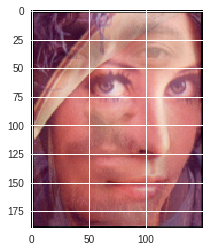

In [82]:
print(my_face.shape)
print(lenna_face.shape)
creepy_baby = cv2.addWeighted(my_face, 0.3, lenna_face,0.7,0)
imshow(creepy_baby)
show()

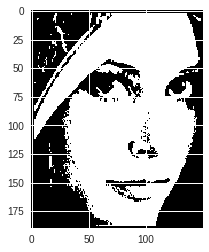

In [93]:
granna_face = cv2.cvtColor(lenna_face, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(granna_face, 100, 255, cv2.THRESH_BINARY_INV)
imshow(mask)
show()

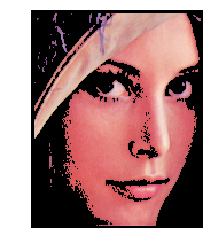

In [97]:
mask_inv = cv2.bitwise_not(mask)
img_fg = cv2.bitwise_and(lenna_face,lenna_face, mask = mask_inv)
axis('off')
imshow(img_fg)
show()

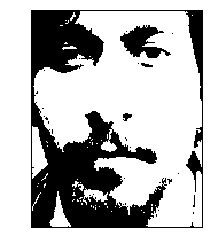

80.0


In [119]:
grace = cv2.cvtColor(my_face, cv2.COLOR_BGR2GRAY)
ret, me_mask = cv2.threshold(grace,80 , 255, cv2.THRESH_BINARY_INV)
axis('off')
imshow(me_mask)
show()
print(ret)

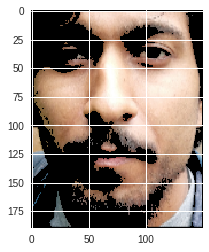

In [121]:
me_inv = cv2.bitwise_not(me_mask)
me_fwd = cv2.bitwise_and(my_face,my_face,mask = me_inv)
imshow(me_fwd)
show()

In [127]:
!wget https://wallpapercave.com/wp/YPR58OX.jpg
!ls


--2018-07-26 15:42:26--  https://wallpapercave.com/wp/YPR58OX.jpg
Resolving wallpapercave.com (wallpapercave.com)... 147.135.36.132
Connecting to wallpapercave.com (wallpapercave.com)|147.135.36.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78620 (77K) [image/jpeg]
Saving to: ‘YPR58OX.jpg.4’

YPR58OX.jpg.4       100%[===================>]  76.78K   186KB/s    in 0.4s    

2018-07-26 15:42:30 (186 KB/s) - ‘YPR58OX.jpg.4’ saved [78620/78620]

cv2_playground.ipynb  filter.jpg  heavy.mkv    YPR58OX.jpg.1
dd_me.jpg	      gola.jpg	  lenna.png    YPR58OX.jpg.2
filter2.jpg	      granna.png  me.jpg       YPR58OX.jpg.3
filter3.jpg	      gravy.avi   YPR58OX.jpg  YPR58OX.jpg.4


(190, 150, 3)
(190, 150, 3)


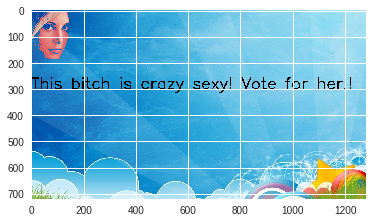

In [145]:
bg = cv2.imread('YPR58OX.jpg')
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
y,x = lenna_face.shape[:2]
aster = bg[0:y,0:x]
lenna_bg = cv2.bitwise_and(aster, aster, mask= mask)
print(lenna_bg.shape)
print(img_fg.shape)
total = cv2.add(lenna_bg, img_fg)
bg[0:y,0:x] = total
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(bg,'This bitch is crazy sexy! Vote for her!!',(0,300), font,2,(0,0,0),3)
imshow(bg)
show()

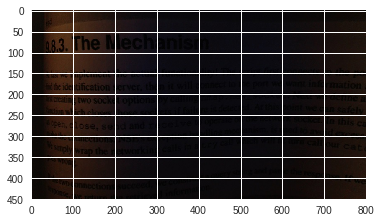

In [5]:
img = cv2.imread('bookpage.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img)
show()

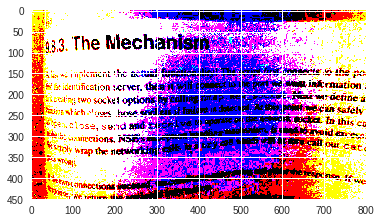

In [6]:
retVal, thres = cv2.threshold(img, 11, 255, cv2.THRESH_BINARY)
imshow(thres)
show()

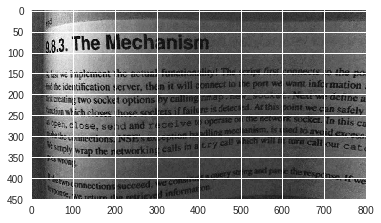

[[240 241 241 ... 243 242 241]
 [242 242 241 ... 242 241 241]
 [243 242 241 ... 242 243 243]
 ...
 [245 246 246 ... 233 231 229]
 [244 245 245 ... 232 231 231]
 [244 245 245 ... 232 231 231]]


In [32]:
graybefore = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
graybefore = 255 - graybefore
imshow(graybefore)
show()
print(graybefore)

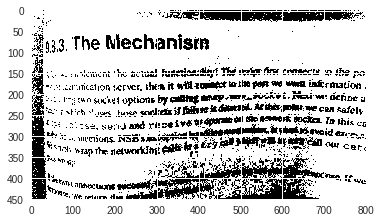

In [33]:
retVal, binary = cv2.threshold(graybefore, 255-11, 255, cv2.THRESH_BINARY)
imshow(binary)
show()

retVal is only used for Otsu filter, otherwise its value is equal to the threshold value we've used.

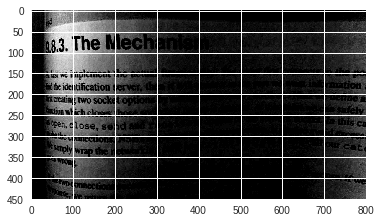

In [34]:

retVal, trunc = cv2.threshold(graybefore, 255-11, 255, cv2.THRESH_TRUNC)
imshow(trunc)
show()

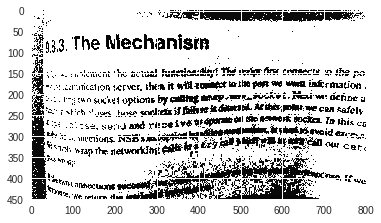

In [36]:
retVal, zero = cv2.threshold(graybefore, 255-11,255, cv2.THRESH_TOZERO)
imshow(zero)
show()

Time for Adaptive thresholding: Gaussian and Otsu

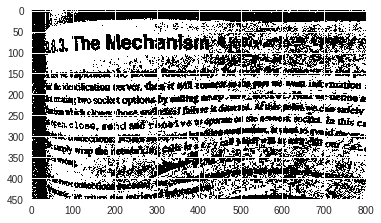

In [47]:
gaus = cv2.adaptiveThreshold(graybefore, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 155 ,1)
gaus = 255 - gaus
imshow(gaus)
show()

(450, 800)


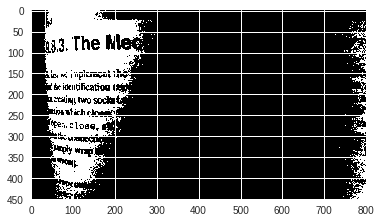

In [48]:
print(graybefore.shape)
retVal, otsu = cv2.threshold(graybefore, 0, 255, cv2.THRESH_OTSU)
imshow(otsu)
show()